<a href="https://colab.research.google.com/github/Namvi3t/DataProjects/blob/main/Sentiment_Analysis_on_Elon_Musk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Files for sentiment analysis
import tweepy #Needed tor Tweepy
import re #Needed for Tweepy
from textblob import TextBlob #Process Textual data
from wordcloud import WordCloud #Help create the world cloud
import pandas as pd #Help use data structures and data analysis tools
import numpy as np #Help perform mathimatical arrays
import matplotlib.pyplot as plt #Help plot graphs
plt.style.use('dark_background') #What type of style/looks of the graph. Dark mode helps my eyes
from google.colab import files

# save your twitter developer account API key and secret and access key and secret in a txt file
# make sure there are no extra white space in your txt file
# upload this text file to Google Colab:

txtfile = files.upload()
keys =  txtfile.get('twkeys.txt').splitlines()

# test your keys and secrets are correct or not:
apiKey = keys[0]
apiKeySecret = keys[1]
accessToken = keys[2]
accessTokenSecret = keys[3]
auth = tweepy.OAuthHandler(apiKey, apiKeySecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
try:
  api.verify_credentials()
  print("verification successful!")  
except: 
  print("authentication error")  # if keys are NOT correct, you should see error

Saving twkeys.txt to twkeys.txt
verification successful!


In [ ]:
# Get 200 tweets from Elon Musk Twitter Page
posts = api.user_timeline(screen_name ="elonmusk", count=200, lang = "en", tweet_mode="extended")

# Print last 200 tweets from Elon Musk
print("Here are 200 recent tweets: \n")
i = 1
for tweet in posts[0:200]: #Print the 200 tweets 
  print(str(i) +')'+ tweet.full_text + "\n")
  i+=1

Here are 200 recent tweets: 

1)@stoolpresidente Even I paid $8, no discount

2)Usage of Twitter continues to rise. One thing is for sure: it isn’t boring!

3)@DojaCat You should be able to change your name now

4)@gainzy222 I’d watch that movie 🍿

5)@kcoleman Community Notes is a gamechanger for improving accuracy on Twitter!

6)@Youssofal_ @BiasedGirl $8

7)@Jeaia @StephenKing @Twitter @jack Yay!

8)@BiasedGirl Far too many corrupt legacy Blue “verification” checkmarks exist, so no choice but to remove legacy Blue in coming months

9)@farzyness @Twitter Indeed

10)I love when people complain about Twitter … on Twitter 🤣🤣

11)@TechAmazing Wow

12)@HansMahncke @micsolana 🤣🤣

13)@StephenKing I’m still a fan of you tbh

14)@StephenKing 👻

15)https://t.co/FxdcXa1I7i

16)@DJSnM I’m not seeing much spam in this reply

17)@davidzweig Yes

18)@Ki_PenYakki_ay Coming

19)@JimMFelton 🤣🤣

20)@mcuban It’s working for me. That said, we can definitely make the verified mentions tab more usable.

21)

In [ ]:
#Create a dataframe 
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns =['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,"@stoolpresidente Even I paid $8, no discount"
1,Usage of Twitter continues to rise. One thing ...
2,@DojaCat You should be able to change your nam...
3,@gainzy222 I’d watch that movie 🍿
4,@kcoleman Community Notes is a gamechanger for...


In [ ]:
#Clean the text here
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove the '@' symbol or the @mentions
  text = re.sub(r'#', '', text) #Remove '#' symbol which is the hash tag
  text = re.sub(r'RT[\s]+', '', text) #Remove Retweets
  text = re.sub(r'https?:\/\/S+', '', text) #Remove hyperlink from the tweets

  return text
  
#Call in the cleanText method
df['Tweets']= df['Tweets'].apply(cleanText)

#Show the cleaned text
df

,Tweets
0,"Even I paid $8, no discount"
1,Usage of Twitter continues to rise. One thing ...
2,You should be able to change your name now
3,I’d watch that movie 🍿
4,Community Notes is a gamechanger for improvin...
...,...
195,"Your feedback is appreciated, now pay $8"
196,Advertisers should support:
197,🤣
198,https://t.co/kGncG7Hs3M


In [ ]:
# Create a Function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Function to determine if the positive or negative by using polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create 2 columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,"Even I paid $8, no discount",0.000000,0.000
1,Usage of Twitter continues to rise. One thing ...,0.944444,-0.250
2,You should be able to change your name now,0.625000,0.500
3,I’d watch that movie 🍿,0.000000,0.000
4,Community Notes is a gamechanger for improvin...,0.000000,0.375
...,...,...,...
195,"Your feedback is appreciated, now pay $8",0.100000,0.200
196,Advertisers should support:,0.000000,0.000
197,🤣,0.000000,0.000
198,https://t.co/kGncG7Hs3M,0.000000,0.000


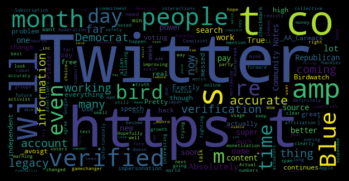

In [ ]:
#The World Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 600, height = 300, random_state = 22, max_font_size = 120).generate(allWords)

#Customize the wordCloud and displaying it
plt.imshow(wordCloud, interpolation = "bilinear")
# Do not show the axies since it makes the image look bad
plt.axis('off')
plt.show()

In [ ]:
#Create a funciton for negative, positive, and neutral analysis
def getAnalysis(score):
  #Determine the polarity  
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#Add another column displaying Analysis
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Display the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Even I paid $8, no discount",0.000000,0.000,Neutral
1,Usage of Twitter continues to rise. One thing ...,0.944444,-0.250,Negative
2,You should be able to change your name now,0.625000,0.500,Positive
3,I’d watch that movie 🍿,0.000000,0.000,Neutral
4,Community Notes is a gamechanger for improvin...,0.000000,0.375,Positive
...,...,...,...,...
195,"Your feedback is appreciated, now pay $8",0.100000,0.200,Positive
196,Advertisers should support:,0.000000,0.000,Neutral
197,🤣,0.000000,0.000,Neutral
198,https://t.co/kGncG7Hs3M,0.000000,0.000,Neutral


In [ ]:
# Print all positive tweets
k=1 #Iterate the list of positive tweets
sortedDF = df.sort_values(by=['Polarity']) #Sort the dataframe into polarity
#Display all positive tweets based on the count from previous code
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]== 'Positive'):
    print(str(k) + ')' +sortedDF['Tweets'][i])
    print()
    k+=1

1) You should be able to change your name now

2) Community Notes is a gamechanger for improving accuracy on Twitter!

3) Far too many corrupt legacy Blue “verification” checkmarks exist, so no choice but to remove legacy Blue in coming months

4)I love when people complain about Twitter … on Twitter 🤣🤣

5) Wow

6) I’m not seeing much spam in this reply

7) It’s working for me. That said, we can definitely make the verified mentions tab more usable.

8)Are you seeing far fewer bots/scams/spam?

9) It’s awesome 🫐

10) Pretty funny though 🤣🤣

11) You’re welcome!

12) We are changing the text to say “Legacy Verified. Could be notable, but could also be bogus.”

13) Subscription Blue is better than legacy Blue. I switched over.

14)   Twitter is growing super fast. I hope it continues!!

15) Blue check will be the great leveler

16) Actual fun stuff FTW!!

17)_AA_Carmack Should be noted that a significant percentage of these accounts are not real people, but some proportion are

18) This i

In [ ]:
# Print all negative tweets
k=1 #Iterate the list of negative tweets
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False') 
#Display all negative tweets based on the count from previous code
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]== 'Negative'):
    print(str(k) + ')' +sortedDF['Tweets'][i])
    print()
    k+=1

1)Usage of Twitter continues to rise. One thing is for sure: it isn’t boring!

2) Rollout of new verified Blue is intentionally limited just to iOS in a few countries with very little promotion. 

As we iron out issues, we will expand worldwide on all platforms.

3)Please note that Twitter will do lots of dumb things in coming months. 

We will keep what works &amp; change what doesn’t.

4)Complaint hotline operator online! Please mention your complaints below.

5) I just killed it

6) It is borderline illegal to support Republicans in San Francisco! 

Even admitting you know some is pretty bad 🤣

7)Hardcore Democrats or Republicans never vote for the other side, so independent voters are the ones who actually decide who’s in charge!

8)To independent-minded voters:

Shared power curbs the worst excesses of both parties, therefore I recommend voting for a Republican Congress, given that the Presidency is Democratic.

9) Not everything needs to have “bird” in the name! Too many bird gro

In [ ]:
# Print all neutral tweets
k=1 #Iterate the list of negative tweets
sortedDF = df.sort_values(by=['Polarity']) 
#Display all neutral tweets based on the count from previous code
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]== 'Neutral'):
    print(str(k) + ')' +sortedDF['Tweets'][i])
    print()
    k+=1

1) Even I paid $8, no discount

2) I’d watch that movie 🍿

3)_  $8

4)    Yay!

5)  Indeed

6)  🤣🤣

7) I’m still a fan of you tbh

8) 👻

9)https://t.co/FxdcXa1I7i

10) Yes

11)_PenYakki_ay Coming

12) 🤣🤣

13) What does a tosh look like?

14) Working on it!

15) That’s coming

16) 🤣

17) In days to come, we’ll add granularity to verified badge, such as organizational affiliation &amp; ID verification

18)  🎯😎💰

19) The goal of Twitter DMs is to superset Signal

20)  Hopefully, as soon as next week

21): Update on our efforts to combat hateful conduct: We've not only mitigated the recent surge in harmful behavior, but have reduce…

22) Totally agree!

23): https://t.co/05QY6u4FSD

24) Nope, I was alway 🥜 !

25) Yeah

26) _Inc Congratulations!

27)_Inc Rockets that aren’t reusable have no future

28) Finally

29) 😎

30) When reality is indistinguishable from satire

31) ✌️

32) 🤣

33) 🤣

34) Yes

35)Twitter is the worst!
But also the best.

36) 🤣

37) 🤣🤷‍♂️

38)_AA_Carmack https://t.co/pg

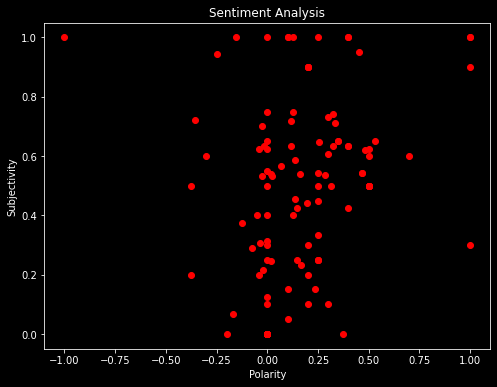

In [ ]:
# Plot polarity and subjectivity using Scatter Plot
#create the Scatter Plot size
plt.figure(figsize=(8,6))
#configure the scatter plot and display the scatter plot
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Calcualte the percentages of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1) #Calculate the percentage

35.5

In [ ]:
# Calcualte  the percentages of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1) #Calculate the percentage

9.5

In [ ]:
# Calcualte  the percentages of neutral tweets
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['Tweets']

round((neutweets.shape[0] / df.shape[0]) * 100, 1) #Calculate the percentage

55.0

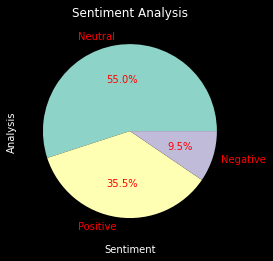

In [ ]:
#Show value counts
df['Analysis'].value_counts()

#Plot and visualzie the counts using a pie chart
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops={'color':"r"})
plt.show()